# Capstone Project
# Customer Satisfaction

##  1. Tóm tắt và hiểu dữ liệu

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cấu hình hiển thị đẹp
sns.set(style="whitegrid")

In [2]:
# Đọc dữ liệu
df = pd.read_csv("../Data/Train_clean.csv")

# Chuyển cột thời gian sang kiểu datetime
date_cols = [
    "Date_Registered", "payment_datetime", "purchased_datetime",
    "released_date", "estimated_delivery_date", "received_date"
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Thêm cột số ngày giao hàng
df["delivery_duration"] = (df["received_date"] - df["released_date"]).dt.days

# Kích thước dữ liệu
print(df.shape)


(205255, 23)


In [3]:
print(df.info())            # Thông tin kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205255 entries, 0 to 205254
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   age                                  205255 non-null  int64         
 1   Gender                               205255 non-null  object        
 2   Date_Registered                      205255 non-null  datetime64[ns]
 3   Is_current_loyalty_program_member    205255 non-null  object        
 4   loyalty_points_redeemed              205255 non-null  int64         
 5   loyalty_tier                         205255 non-null  float64       
 6   Received_tier_discount_percentage    205255 non-null  float64       
 7   Received_card_discount_percentage    205255 non-null  float64       
 8   Received_coupon_discount_percentage  205255 non-null  int64         
 9   product_category                     205255 non-null  object        
 

In [111]:
# Kiểm tra kiểu dữ liệu
print(df.dtypes)

age                                             int64
Gender                                         object
Date_Registered                        datetime64[ns]
Is_current_loyalty_program_member              object
loyalty_points_redeemed                         int64
loyalty_tier                                  float64
Received_tier_discount_percentage             float64
Received_card_discount_percentage             float64
Received_coupon_discount_percentage             int64
product_category                               object
Product_value                                   int64
payment_method                                 object
payment_datetime                       datetime64[ns]
purchased_datetime                     datetime64[ns]
purchase_medium                                object
final_payment                                 float64
released_date                          datetime64[ns]
estimated_delivery_date                datetime64[ns]
received_date               

In [4]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

age                                       0
Gender                                    0
Date_Registered                           0
Is_current_loyalty_program_member         0
loyalty_points_redeemed                   0
loyalty_tier                              0
Received_tier_discount_percentage         0
Received_card_discount_percentage         0
Received_coupon_discount_percentage       0
product_category                          0
Product_value                             0
payment_method                            0
payment_datetime                          0
purchased_datetime                        0
purchase_medium                           0
final_payment                             0
released_date                             0
estimated_delivery_date                   0
received_date                             0
shipping_method                           0
customer_experience                       0
Age-Group                              1289
delivery_duration               

In [5]:
# Kiểm tra các giá trị duy nhất của cột Age-Group
df["Age-Group"].unique()


array(['Middle', 'Elderly', 'Adult', 'Teenager', nan], dtype=object)

### Bổ sung Age-group thiếu

In [6]:
# Kiểm tra những Age-Group đã có trong dữ liệu
existing_groups = df["Age-Group"].dropna().unique()
print("Các nhóm tuổi đã có:", existing_groups)


Các nhóm tuổi đã có: ['Middle' 'Elderly' 'Adult' 'Teenager']


In [7]:
# Kiểm tra phân phối độ tuổi trong các nhóm tuổi đã có
age_group_distribution = df.groupby("Age-Group")["age"].describe()
print(age_group_distribution)

             count       mean       std   min   25%   50%   75%   max
Age-Group                                                            
Adult      46740.0  25.493325  2.866317  21.0  23.0  25.0  28.0  30.0
Elderly    70643.0  52.998485  4.323098  46.0  49.0  53.0  57.0  60.0
Middle     70970.0  37.988869  4.307348  31.0  34.0  38.0  42.0  45.0
Teenager   15613.0  19.074681  0.825737  18.0  18.0  19.0  20.0  20.0


In [8]:
# Hàm phân loại độ tuổi (sử dụng phân phối độ tuổi đã có)
def categorize_age_based_on_existing(age, existing_groups, df):
    # Tính toán độ tuổi trung bình của các nhóm tuổi đã có
    group_averages = df.groupby("Age-Group")["age"].mean()
    
    # Phân loại độ tuổi vào nhóm gần nhất
    closest_group = min(existing_groups, key=lambda group: abs(group_averages[group] - age))
    return closest_group

# Dự đoán Age-Group cho các dòng thiếu
df["Age-Group"] = df.apply(lambda row: categorize_age_based_on_existing(row["age"], existing_groups, df) 
                           if pd.isnull(row["Age-Group"]) else row["Age-Group"], axis=1)

# Kiểm tra xem còn thiếu giá trị không
print(df["Age-Group"].isnull().sum())



0


### Thống kê mô tả

In [119]:
# Thống kê mô tả
print(df.describe(include='all'))

                  age  Gender                Date_Registered  \
count   205255.000000  205255                         205255   
unique            NaN       3                            NaN   
top               NaN  Female                            NaN   
freq              NaN   68796                            NaN   
mean        38.632009     NaN  2022-06-30 17:20:38.843390208   
min          0.000000     NaN            2020-01-01 00:00:00   
25%         28.000000     NaN            2021-04-01 00:00:00   
50%         39.000000     NaN            2022-07-01 00:00:00   
75%         50.000000     NaN            2023-09-28 12:00:00   
max         60.000000     NaN            2024-12-27 00:00:00   
std         12.795541     NaN                            NaN   

       Is_current_loyalty_program_member  loyalty_points_redeemed  \
count                             205255            205255.000000   
unique                                 2                      NaN   
top                     

## 2. Phân tích đơn biến (Univariate Analysis)

In [121]:
# Kiểm tra số lượng giá trị duy nhất và tần suất
print(df['customer_experience'].value_counts())

customer_experience
good       89678
bad        68535
neutral    47042
Name: count, dtype: int64


### 2.1. Phân tích sự hài lòng của khách hàng

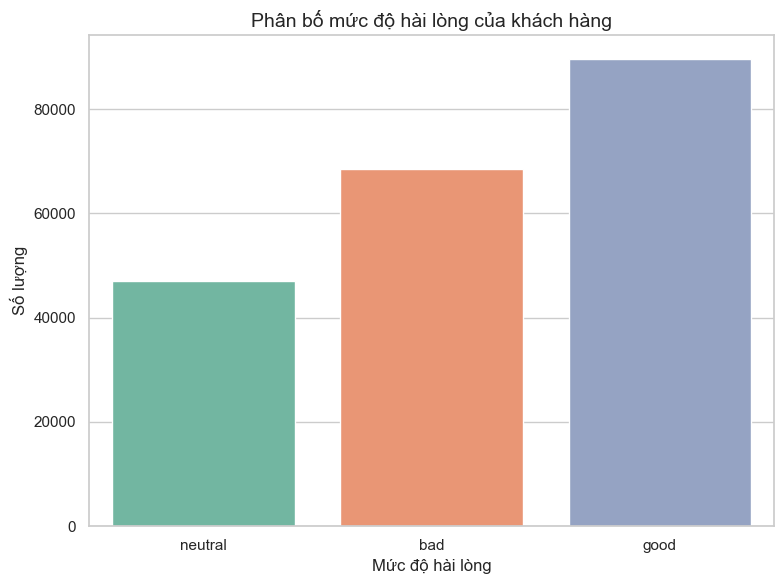

In [123]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_experience',
              hue='customer_experience',
              palette='Set2',
              legend=False)  # Không cần hiển thị chú thích

plt.title('Phân bố mức độ hài lòng của khách hàng', fontsize=14)
plt.xlabel('Mức độ hài lòng')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()


### 2.2. Phân tích độ hài lòng theo giới tính:

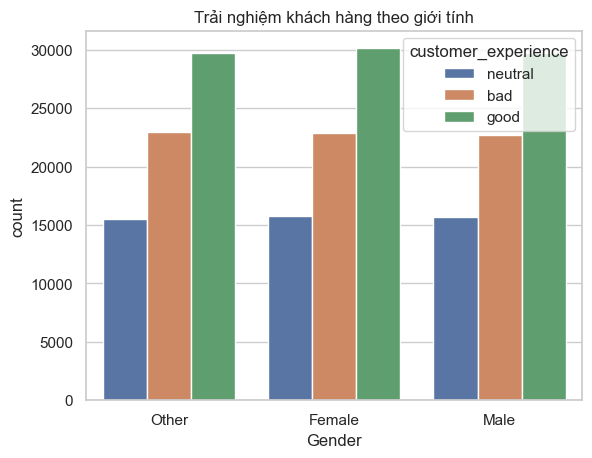

In [125]:
sns.countplot(data=df, x='Gender', hue='customer_experience')
plt.title("Trải nghiệm khách hàng theo giới tính")
plt.show()


### 2.3. Nhóm tuổi vs Trải nghiệm

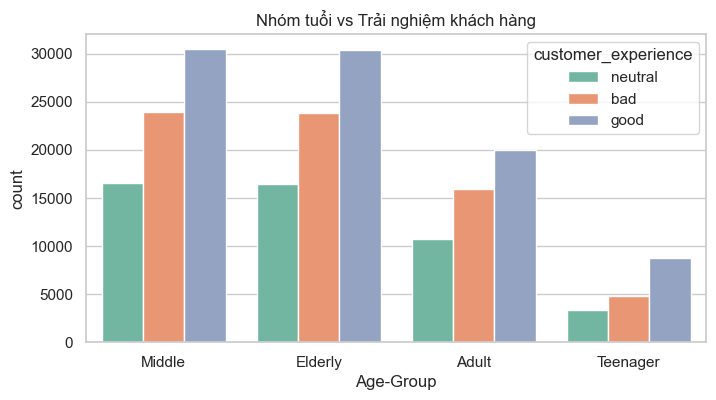

In [127]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Age-Group', hue='customer_experience', palette='Set2')
plt.title("Nhóm tuổi vs Trải nghiệm khách hàng")
plt.show()

### 2.4. Loyalty tier vs Trải nghiệm

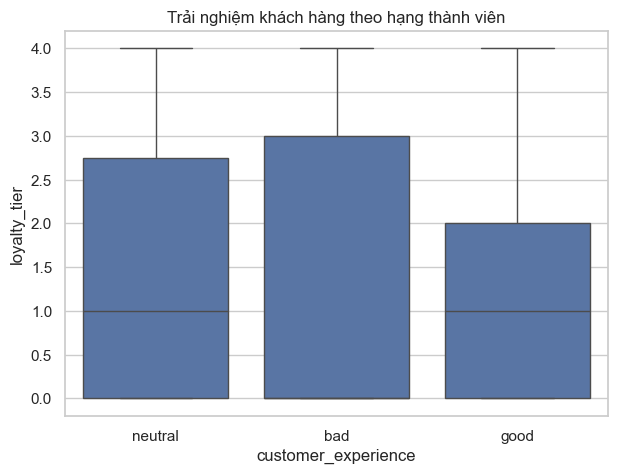

In [129]:
plt.figure(figsize=(7,5))
sns.boxplot(x='customer_experience', y='loyalty_tier', data=df)
plt.title("Trải nghiệm khách hàng theo hạng thành viên")
plt.show()

In [131]:
df[df['customer_experience'] == 'bad']['loyalty_tier']


1         1.0
3         1.0
4         1.0
5         0.0
10        4.0
         ... 
205248    4.0
205249    1.0
205250    0.0
205251    0.0
205252    4.0
Name: loyalty_tier, Length: 68535, dtype: float64

### 2.5. Shipping method vs Trải nghiệm

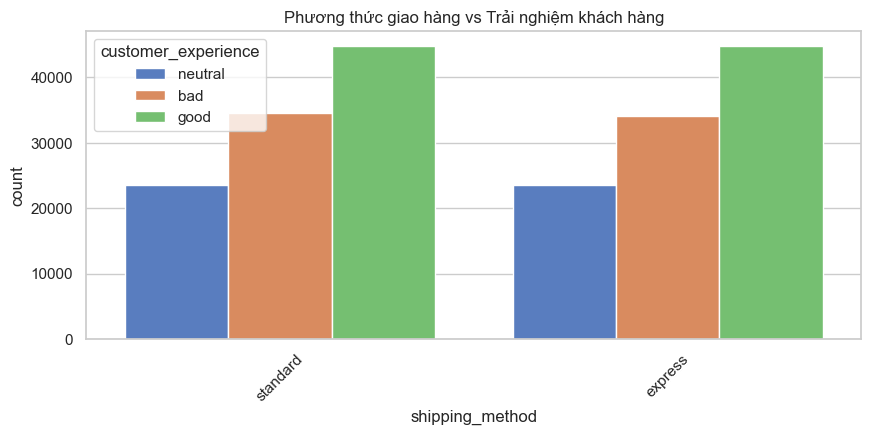

In [133]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='shipping_method', hue='customer_experience', palette='muted')
plt.title("Phương thức giao hàng vs Trải nghiệm khách hàng")
plt.xticks(rotation=45)
plt.show()

In [135]:
df.groupby('shipping_method')['customer_experience'].value_counts(normalize=True)

shipping_method  customer_experience
express          good                   0.437938
                 bad                    0.332477
                 neutral                0.229585
standard         good                   0.435887
                 bad                    0.335320
                 neutral                0.228793
Name: proportion, dtype: float64

Từ những tỷ lệ này, chúng ta có thể thấy rằng sự phân bổ giữa các nhóm "good", "bad", và "neutral" gần như không khác biệt nhiều giữa hai phương thức giao hàng. Cả hai phương thức đều có tỷ lệ "good" xấp xỉ nhau (chênh lệch chỉ khoảng 0.2%), và tỷ lệ "bad" cũng gần như tương tự (chênh lệch khoảng 0.1%).</br>
Điều này cho thấy, từ quan điểm dữ liệu, phương thức giao hàng không tạo ra sự khác biệt rõ rệt trong trải nghiệm khách hàng.

### 2.6. Thời gian giao hàng theo mức độ hài lòng

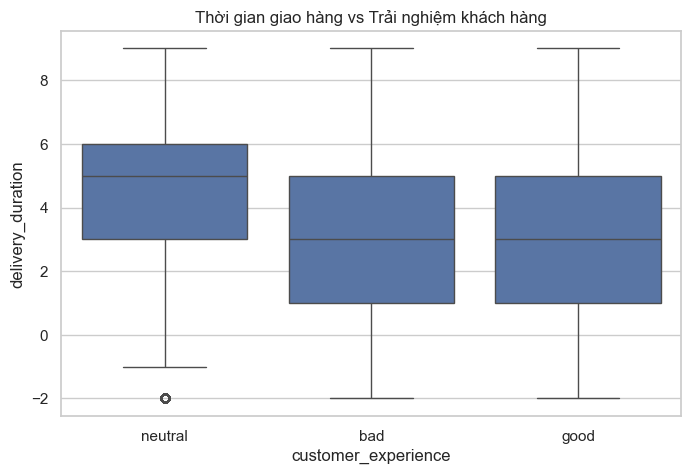

In [137]:
plt.figure(figsize=(8,5))
sns.boxplot(x='customer_experience', y='delivery_duration', data=df)
plt.title("Thời gian giao hàng vs Trải nghiệm khách hàng")
plt.show()

Nhận xét:
"Neutral" có thời gian giao hàng trung bình và trung vị cao hơn so với "bad" và "good".

Cả ba nhóm đều có khoảng thời gian giao hàng gần giống nhau, nhưng "neutral" lại nhận hàng chậm hơn một chút.

Có một vài giá trị âm → cần kiểm tra lại dữ liệu: có thể received_date < released_date là lỗi.

## 3. Khảo sát đa biến

### 3.1. Khám phá mối quan hệ giữa các biến số học (numeric variables) và sự hài lòng của khách hàng.

In [139]:
print(df['customer_experience'].unique())


['neutral' 'bad' 'good']


In [9]:
# Chuẩn hóa chữ thường + loại khoảng trắng
df['customer_experience'] = df['customer_experience'].str.strip().str.lower()

# Map giá trị thành số
experience_map = {
    'bad': 0,
    'neutral': 1,
    'good': 2
}

df['customer_experience'] = df['customer_experience'].map(experience_map)


In [10]:
print(df['customer_experience'].value_counts())

customer_experience
2    89678
0    68535
1    47042
Name: count, dtype: int64


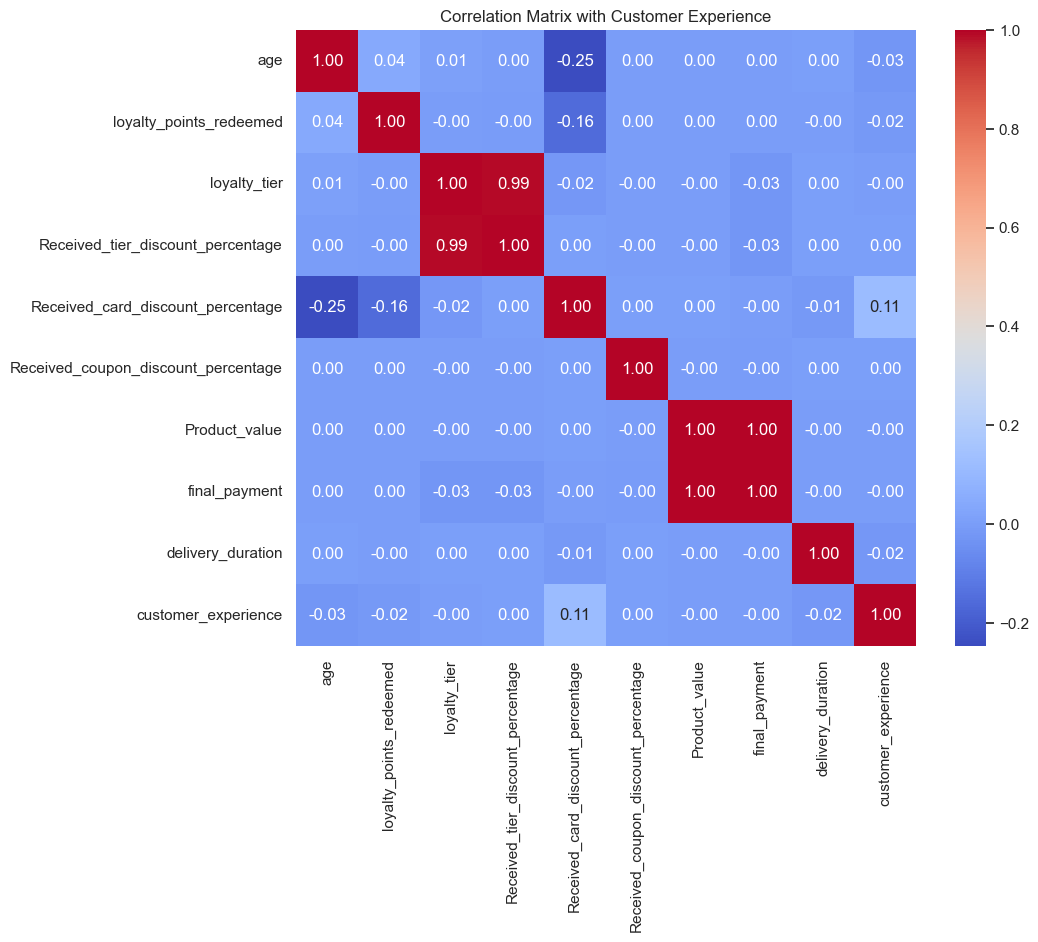

In [11]:
# Chọn các cột số học liên quan
numerical_cols = ['age', 'loyalty_points_redeemed', 'loyalty_tier',
                  'Received_tier_discount_percentage', 'Received_card_discount_percentage',
                  'Received_coupon_discount_percentage', 'Product_value',
                  'final_payment', 'delivery_duration', 'customer_experience']

# Tính ma trận tương quan
corr_matrix = df[numerical_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Customer Experience")
plt.show()

### 3.2. Khám phá mối quan hệ giữa các biến phân loại (categorical variables) và sự hài lòng.

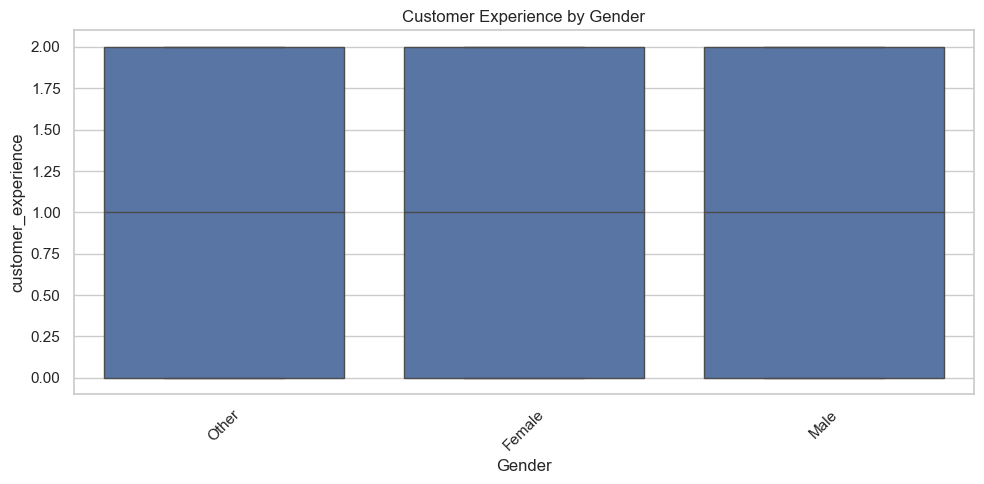

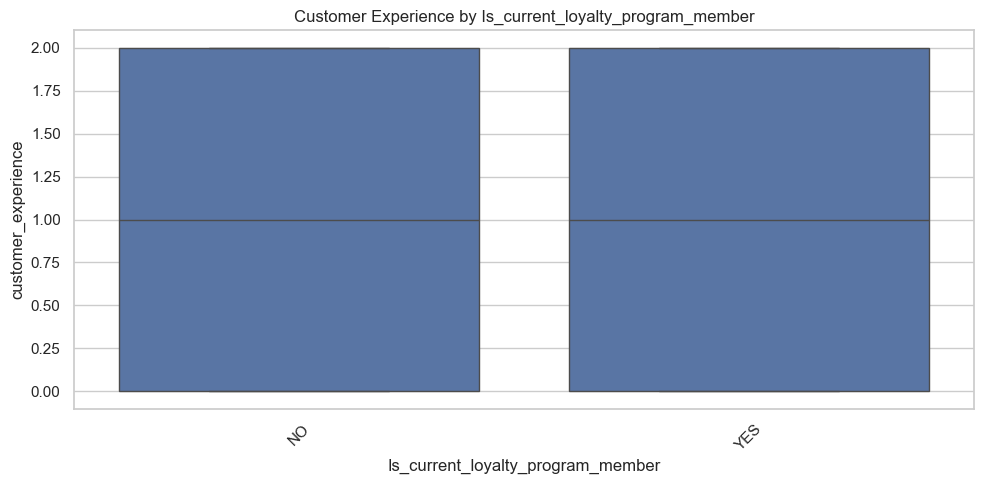

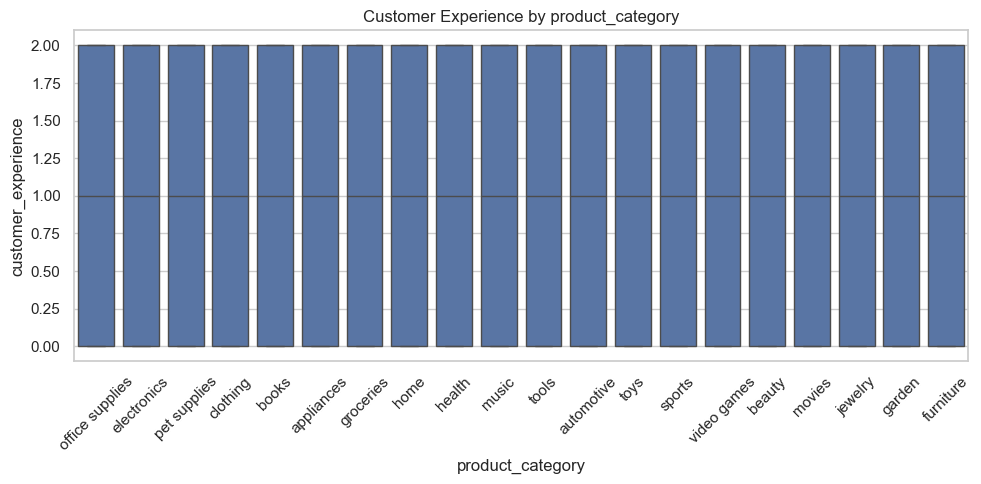

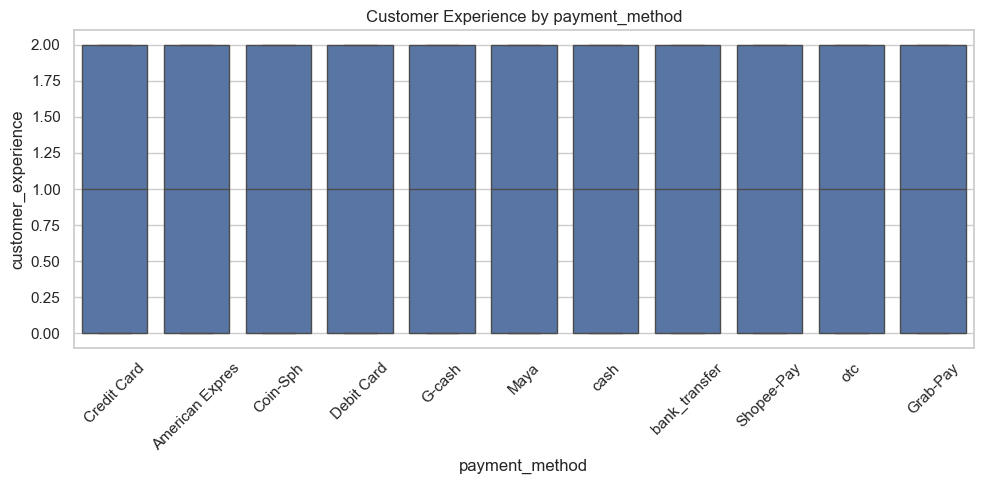

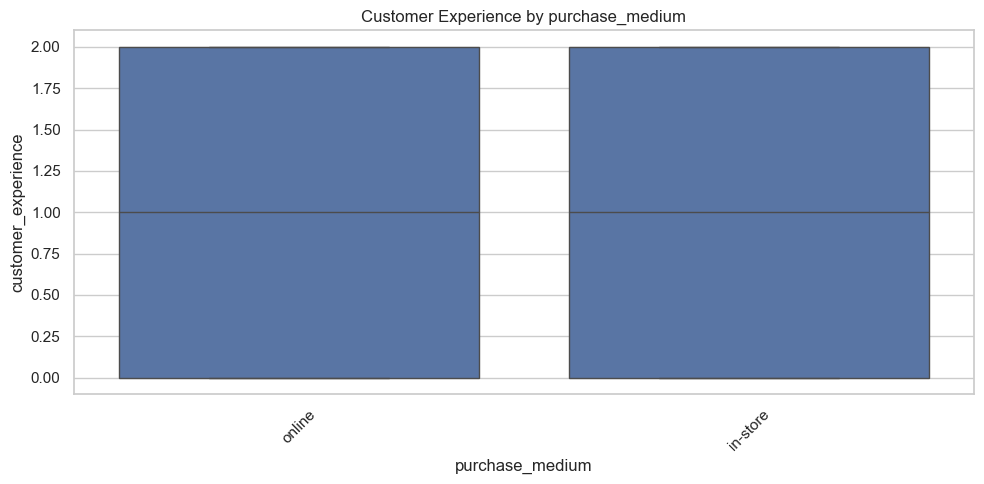

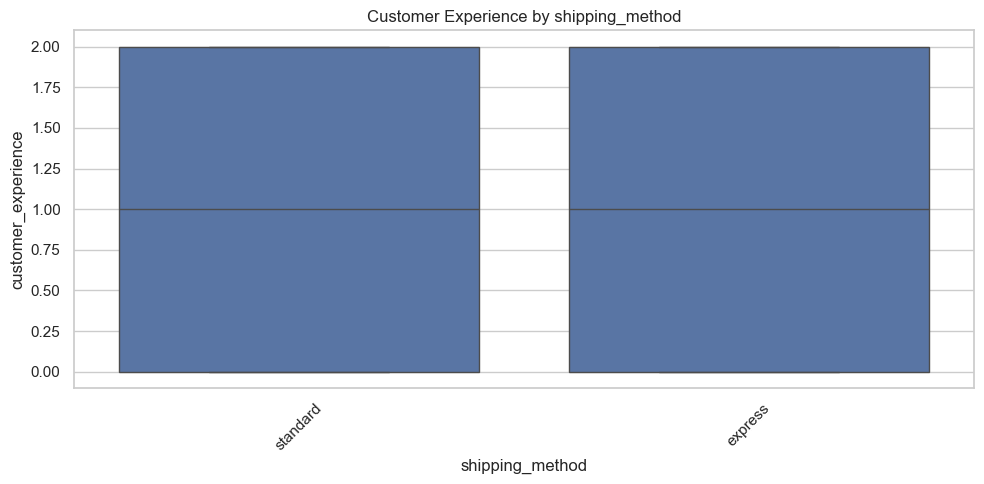

In [12]:
categorical_cols = ['Gender', 'Is_current_loyalty_program_member', 'product_category',
                    'payment_method', 'purchase_medium', 'shipping_method']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='customer_experience', data=df)
    plt.title(f"Customer Experience by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3.3.3. Khảo sát mối quan hệ giữa các biến với nhau

#### Phân tích theo nhóm (groupby)

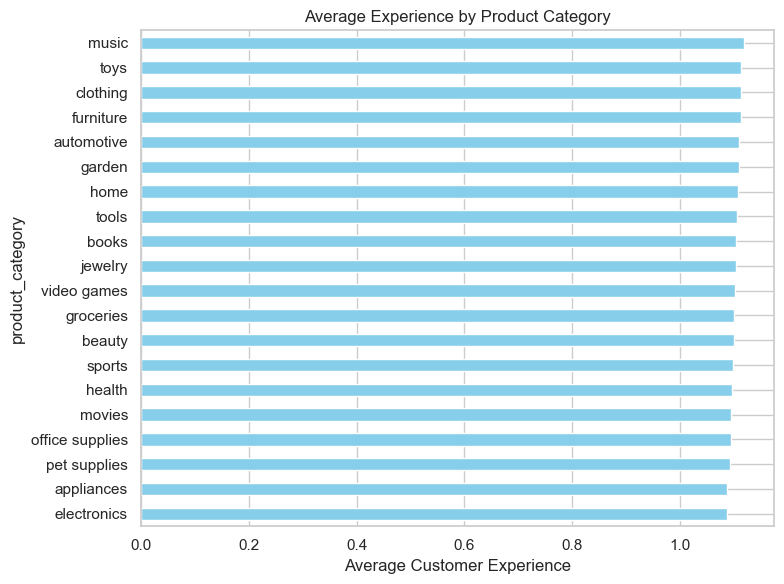

In [13]:
# Trung bình mức độ hài lòng theo từng nhóm sản phẩm
avg_exp_by_product = df.groupby('product_category')['customer_experience'].mean().sort_values()

avg_exp_by_product.plot(kind='barh', figsize=(8,6), color='skyblue')
plt.xlabel("Average Customer Experience")
plt.title("Average Experience by Product Category")
plt.tight_layout()
plt.show()


#### 1. Trung bình mức độ hài lòng theo từng hình thức thanh toán

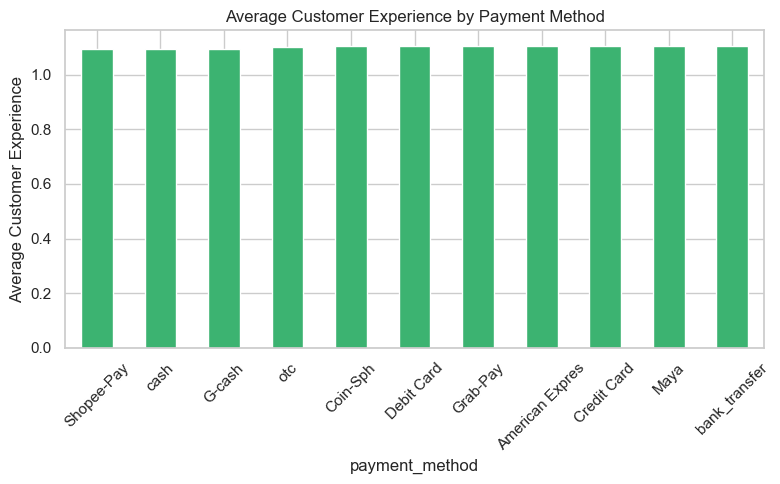

In [14]:
# Tính trung bình mức độ hài lòng theo từng hình thức thanh toán
payment_exp = df.groupby('payment_method')['customer_experience'].mean().sort_values()

# Vẽ biểu đồ
payment_exp.plot(kind='bar', color='mediumseagreen', figsize=(8, 5))
plt.ylabel("Average Customer Experience")
plt.title("Average Customer Experience by Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2. Boxplot trực quan giữa payment_method và customer_experience

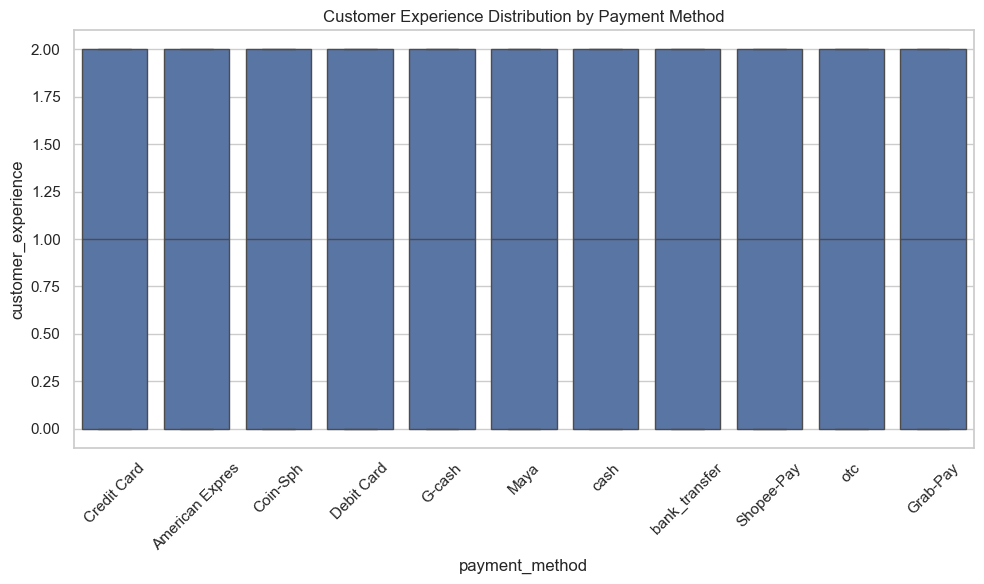

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_method', y='customer_experience', data=df)
plt.title("Customer Experience Distribution by Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. Tần suất từng mức độ hài lòng theo từng hình thức thanh toán

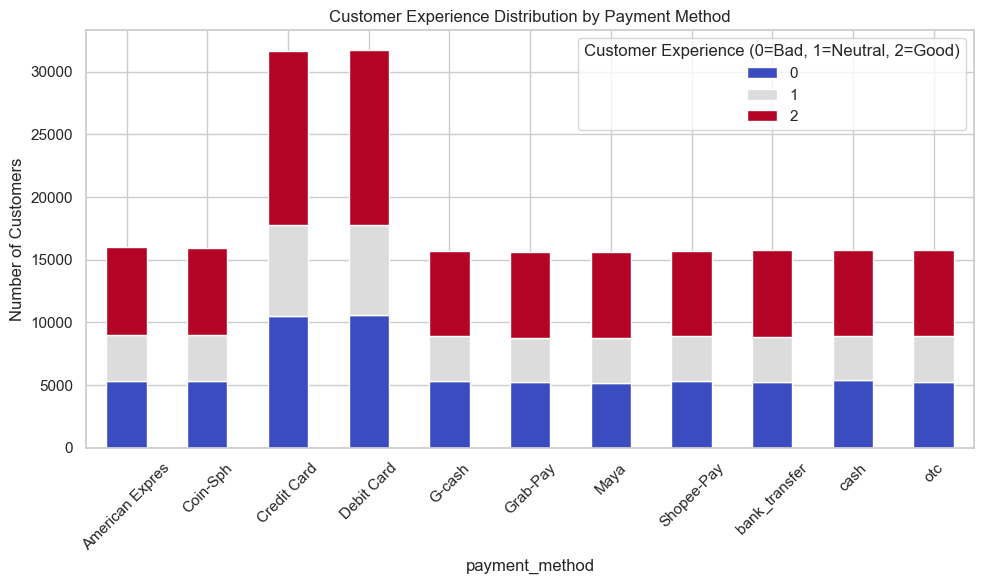

In [16]:
# Đếm số lượng khách hàng theo mỗi mức độ hài lòng và hình thức thanh toán
exp_count = df.groupby(['payment_method', 'customer_experience']).size().unstack().fillna(0)

# Vẽ biểu đồ stacked bar
exp_count.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.ylabel("Number of Customers")
plt.title("Customer Experience Distribution by Payment Method")
plt.xticks(rotation=45)
plt.legend(title="Customer Experience (0=Bad, 1=Neutral, 2=Good)")
plt.tight_layout()
plt.show()
